# Visualization of holomorphic functions with Python

Source: 

  - Title:   Scientific Visualisation - Python & Matplotlib
  - Author:  Nicolas P. Rougier
  - URL:     https://github.com/rougier/scientific-visualization-book
  - License: BSD

TODO:
  - plots & contours
  - start 3D plots with real and imag, urk, not very useful.
  - vectorisation
  - tricks with integer (non-labelled) contours
  - exploration with real, imag. Use IFT & conformal transform to explain what we see (90° angles) ?
  - then modulus, log-modulus, angle, etc.

In [5]:
from numpy import *
from matplotlib.pyplot import *


## Paths

In [6]:
def path_concat(*paths):
    @vectorize
    def path(t):
        n = len(paths)
        i = int(n * t)
        s = n * t - i
        if s == 0.0 and i > 0:
            i, s = i - 1, 1.0
        return paths[i](s)
    return path

def path_plot(path, n=1000, *args, **kwargs):
    t = linspace(0.0, 1.0, n)
    path_t = path(t)
    plot(path_t.real, path_t.imag, *args, **kwargs)
        

In [7]:
def circle(c=0j, r=1.0, arg=0.0, n=1):
    def gamma(t):
        return r * exp(1j * (arg + 2 * pi * n * t)) + c

    return gamma


def line(z0=0, z1=1):
    def gamma(t):
        return (1 - t) * z0 + t * z1

    return gamma


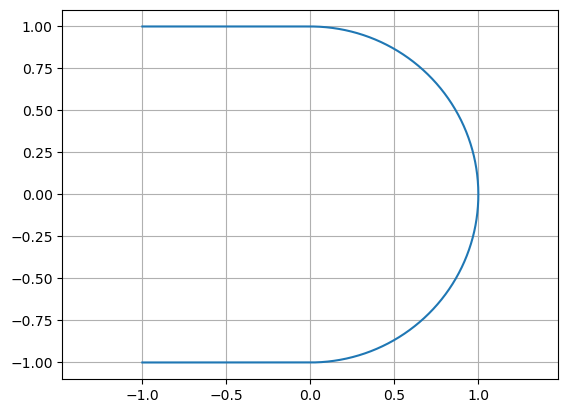

In [8]:
path = path_concat(
    line(-1-1j, -1j),
    circle(arg=-pi/2, n=1/2),
    line(1j, 1j-1)
)
path_plot(path)
axis("equal")
grid(True)

In [46]:
def grid(xs, ys):
    paths = []
    x_min, x_max = xs[0], xs[-1]
    y_min, y_max = ys[0], ys[-1]
    for x in xs:
        paths.append(line(x+1j*y_min, x+1j*y_max))
    for y in ys:
        paths.append(line(x_min+1j*y, x_max+1j*y))
    return paths

def polar_grid(rs, thetas):
    paths = []
    r_min, r_max = rs[0], rs[-1]
    theta_min, theta_max = thetas[0], thetas[-1]

    for r in rs:
        paths.append(circle(r=r, arg=theta_min, n=(theta_max-theta_min)/2/pi))
    for theta in thetas:
        paths.append(line(r_min*exp(1j*theta), r_max*exp(1j*theta)))
    return paths

## Conformal Mappings

(0.265, 1.035, -0.55, 0.55)

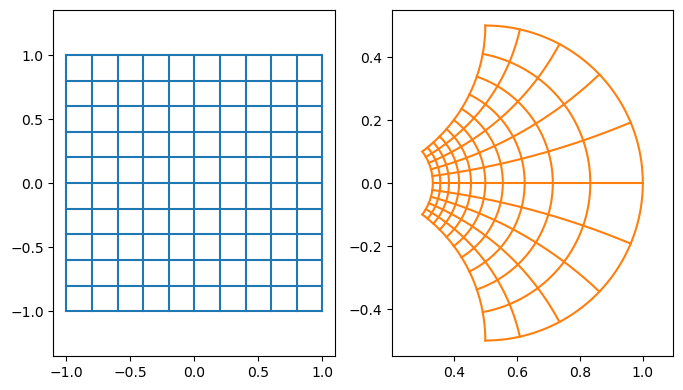

In [40]:

def f(z):
    return 1/(z+2)


paths = grid(xs=linspace(-1,1, 11), ys=linspace(-1, 1, 11))
t = linspace(0.0, 1.0, 1000)
fig, (ax1, ax2) = subplots(1, 2, figsize=(8, 4.5))
for path in paths:
    path_t = path(t)
    f_path_t = f(path_t)
    ax1.plot(path_t.real, path_t.imag, color="C0")
    ax2.plot(f_path_t.real, f_path_t.imag, color="C1")

ax1.axis("equal")
ax2.axis("equal")
None

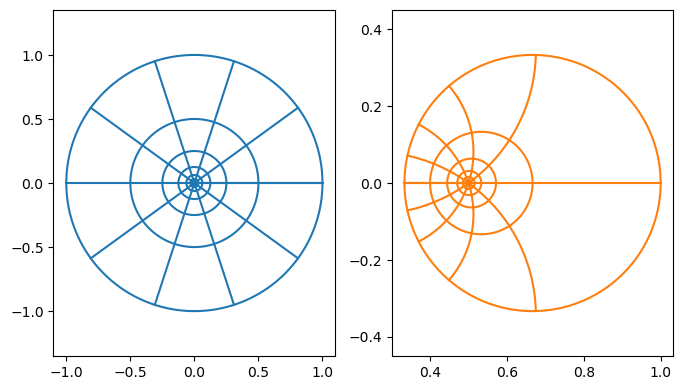

In [49]:
def f(z):
    return 1/(z+2)


paths = polar_grid(rs=logspace(-10, 0, 11, base=2), thetas=linspace(0, 2*pi, 11))

t = linspace(0.0, 1.0, 1000)
fig, (ax1, ax2) = subplots(1, 2, figsize=(8, 4.5))
for path in paths:
    path_t = path(t)
    f_path_t = f(path_t)
    ax1.plot(path_t.real, path_t.imag, color="C0")
    ax2.plot(f_path_t.real, f_path_t.imag, color="C1")

ax1.axis("equal")
ax2.axis("equal")
None

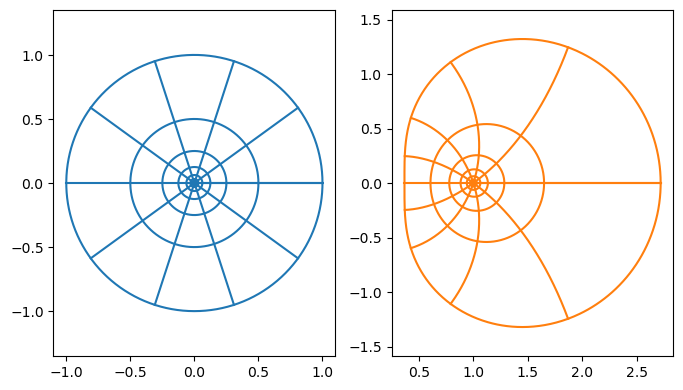

In [54]:
def f(z):
    return exp(z)


paths = polar_grid(rs=logspace(-10, 0, 11, base=2), thetas=linspace(0, 2*pi, 11))

t = linspace(0.0, 1.0, 1000)
fig, (ax1, ax2) = subplots(1, 2, figsize=(8, 4.5))
for path in paths:
    path_t = path(t)
    f_path_t = f(path_t)
    ax1.plot(path_t.real, path_t.imag, color="C0")
    ax2.plot(f_path_t.real, f_path_t.imag, color="C1")

ax1.axis("equal")
ax2.axis("equal")
None

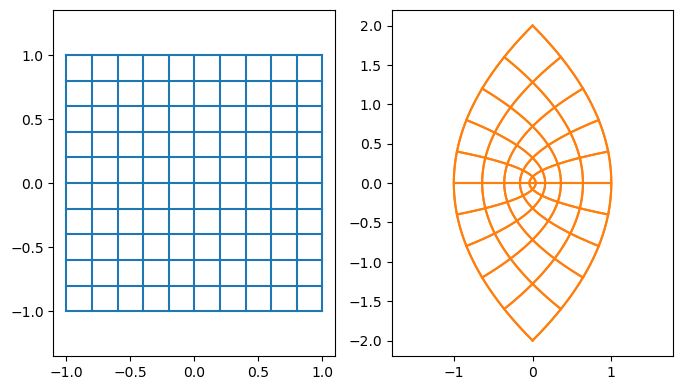

In [45]:
def f(z):
    return z*z
paths = grid(xs=linspace(-1,1, 11), ys=linspace(-1, 1, 11))
t = linspace(0.0, 1.0, 1000)
fig, (ax1, ax2) = subplots(1, 2, figsize=(8, 4.5))
for path in paths:
    path_t = path(t)
    f_path_t = f(path_t)
    ax1.plot(path_t.real, path_t.imag, color="C0")
    ax2.plot(f_path_t.real, f_path_t.imag, color="C1")

ax1.axis("equal")
ax2.axis("equal")
None

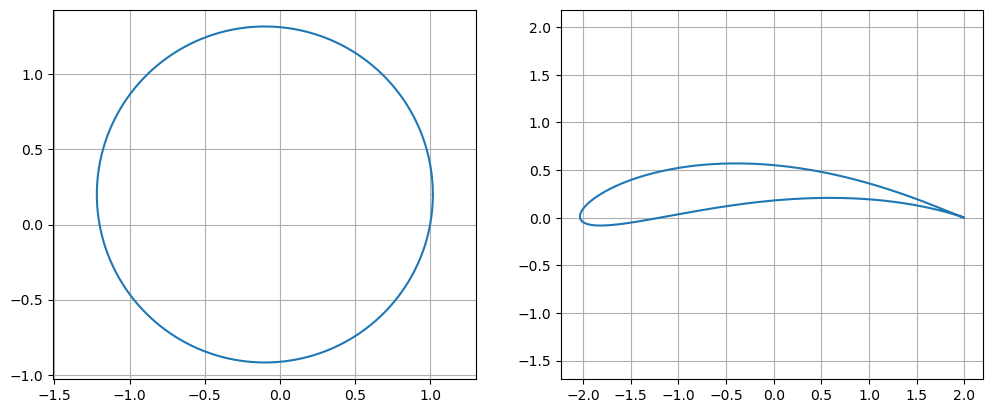

In [74]:

def Joukowsky(z):
    return z + 1.0 / z

c = -0.1 + 0.2j
r = abs(c - 1)

gamma = circle(c=c, r=r)
J_gamma = lambda t: Joukowsky(gamma(t))

fig, (ax1, ax2) = subplots(1,2)
fig.set_figwidth(12)

t = linspace(0.0, 1.0, 1000)

ax1.plot(gamma(t).real, gamma(t).imag, color="C0")
ax1.grid(True)
ax1.axis("equal")

ax2.plot(J_gamma(t).real, J_gamma(t).imag, color="C0")
ax2.grid(True)
ax2.axis("equal")

None

# TODO: study/explain the "pinch" (f'=0 when z=1 => angle doubling)
# TODO: irrotational & incompressible flow. Solve for cylinder, then map?


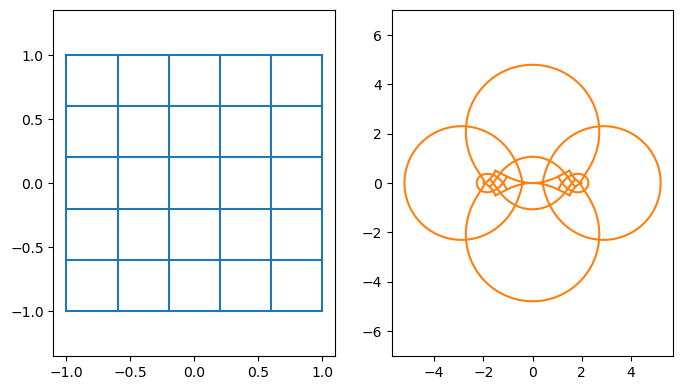

In [72]:

f = Joukowsky

paths = grid(xs=linspace(-1,1, 6), ys=linspace(-1, 1, 6))
t = linspace(0.0, 1.0, 1000)
fig, (ax1, ax2) = subplots(1, 2, figsize=(8, 4.5))
for path in paths:
    path_t = path(t)
    f_path_t = f(path_t)
    ax1.plot(path_t.real, path_t.imag, color="C0")
    ax2.plot(f_path_t.real, f_path_t.imag, color="C1")

ax1.axis("equal")
ax2.axis("equal")
None

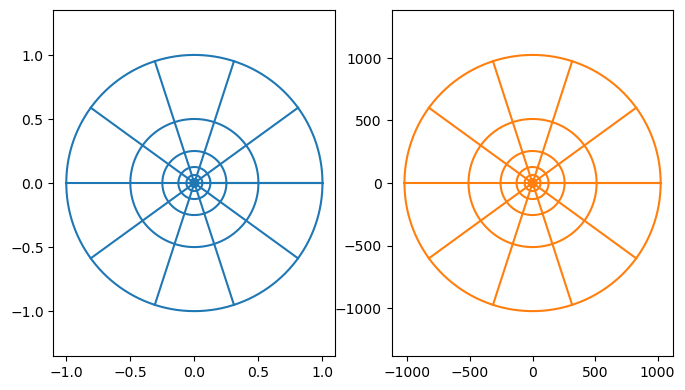

In [60]:
f = Joukowsky


paths = polar_grid(rs=logspace(-10, 0, 11, base=2), thetas=linspace(0, 2*pi, 11))

t = linspace(0.0, 1.0, 1000)
fig, (ax1, ax2) = subplots(1, 2, figsize=(8, 4.5))
for path in paths:
    path_t = path(t)
    f_path_t = f(path_t)
    ax1.plot(path_t.real, path_t.imag, color="C0")
    ax2.plot(f_path_t.real, f_path_t.imag, color="C1")

ax1.axis("equal")
ax2.axis("equal")
None

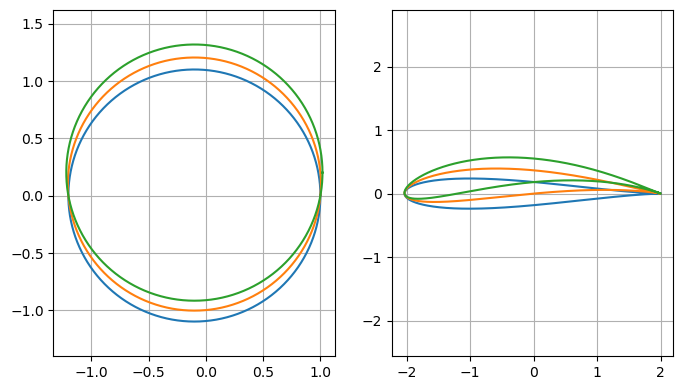

In [75]:
cs = [-0.1 + 1j*y for y in [0.0, 0.1, 0.2]]
rs = [abs(c - 1) for c in cs]

fig, (ax1, ax2) = subplots(1, 2, figsize=(8, 4.5))

for i, (c, r) in enumerate(zip(cs, rs)):

    gamma = circle(c=c, r=r)
    J_gamma = lambda t: Joukowsky(gamma(t))

    t = linspace(0.0, 1.0, 1000)

    color = "C" + str(i)

    ax1.plot(gamma(t).real, gamma(t).imag, color=color)
    ax1.grid(True)
    ax1.axis("equal")

    ax2.plot(J_gamma(t).real, J_gamma(t).imag, color=color)
    ax2.grid(True)
    ax2.axis("equal")

None
# TODO: needs animation, or grid (3*4 grid ?) for the different designs.

In [ ]:

T = linspace(-2.5, 2.5, 2048)
X, Y = meshgrid(T, T)
Z = X + 1j * Y

W = f(Z)

figure(figsize=(8, 8))
xlim(-2.5, 2.5)
ylim(-2.5, 2.5)
# document "trick" to get all integer levels
contour(X, Y, W.real - round_(W.real), levels=[0.0], colors="black", linewidths=0.5)
contour(X, Y, W.imag - round_(W.imag), levels=[0.0], colors="black", linewidths=0.5)
axis("equal")
ax = gca()
# ax.set_xticks([])
# ax.set_yticks([])
None

## Domain Coloring

In [ ]:
# TODO: collection of functions and small gallery

def Joukowsky(z):
    return z + 1.0 / z

def f(Z):
    return Z # try several multiplicities, products, ratios, etc.

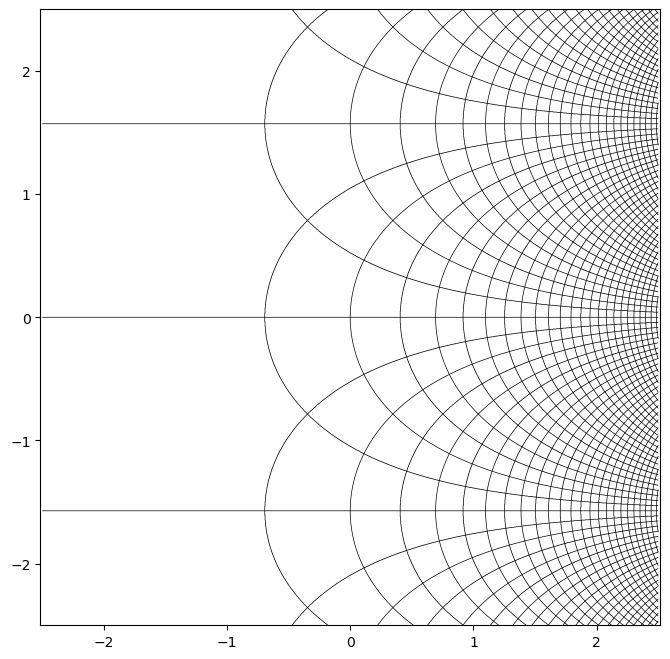

In [76]:
# Honnestly, not sure that plotting Re and Im is useful in any way.
# But the rendering is also a bit weird TBH, I should check what's going on.
T = linspace(-2.5, 2.5, 2048)
X, Y = meshgrid(T, T)
Z = X + 1j * Y

# TODO: introduce contour principles beforehand (quadratic function?)
# TODO: display initial grid (aka f(z)=z) and then the mapping.

f = exp
W = f(Z)

figure(figsize=(8, 8))
xlim(-2.5, 2.5)
ylim(-2.5, 2.5)
# document "trick" to get all integer levels
contour(X, Y, W.real - round_(W.real), levels=[0.0], colors="black", linewidths=0.5)
contour(X, Y, W.imag - round_(W.imag), levels=[0.0], colors="black", linewidths=0.5)
axis("equal")
ax = gca()
# ax.set_xticks([])
# ax.set_yticks([])
None


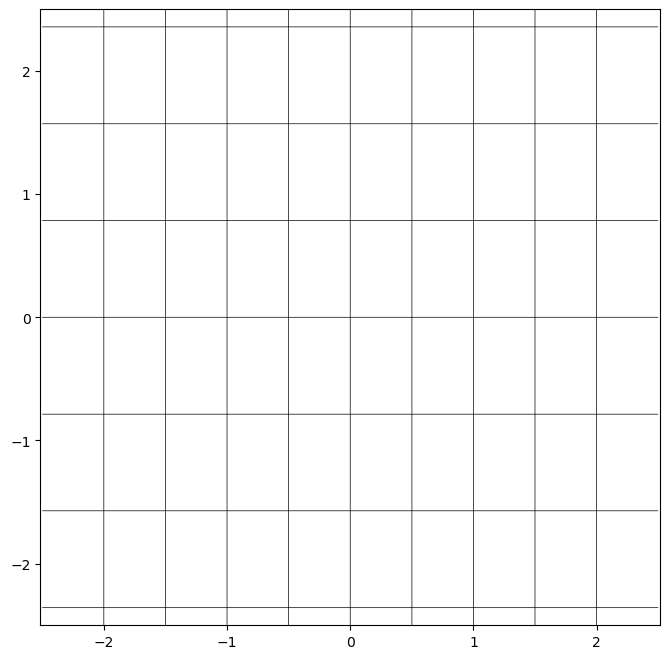

In [77]:
T = linspace(-2.5, 2.5, 2048)
X, Y = meshgrid(T, T)
Z = X + 1j * Y

f = exp
W = f(Z)
L = log(abs(W)) # symmetric for poles & zeros
N = 2
A = (angle(W)/pi) * N #  multiples of pi/N mapped to integers

figure(figsize=(8, 8))
xlim(-2.5, 2.5)
ylim(-2.5, 2.5)
# document "trick" to get all integer levels
contour(X, Y, L - round_(L), levels=[0.0], colors="black", linewidths=0.5)
contour(X, Y, A - round_(A), levels=[0.0], colors="black", linewidths=0.5)
axis("equal")
ax = gca()
# ax.set_xticks([])
# ax.set_yticks([])
None

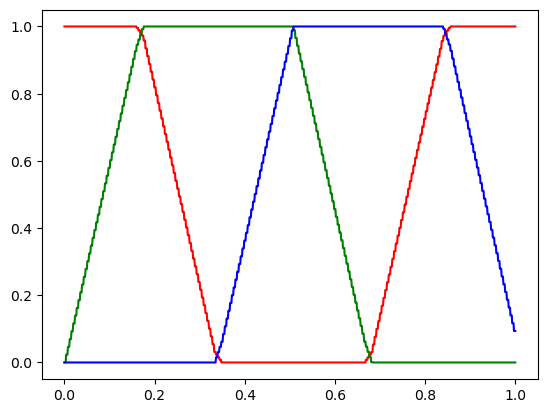

In [ ]:
import matplotlib.cm as mcm

colormap = mcm.get_cmap("hsv")
u = linspace(0.0, 1.0, 1024)
RGBA = colormap(u)  # float64, but discretised (8-bit)
RGB = RGBA[:, :3]
plot(u, RGB[:, 0], color="red")
plot(u, RGB[:, 1], color="green")
plot(u, RGB[:, 2], color="blue")

None

# NOTA: we can deliver a RBGA array to imshow, that works! 👍


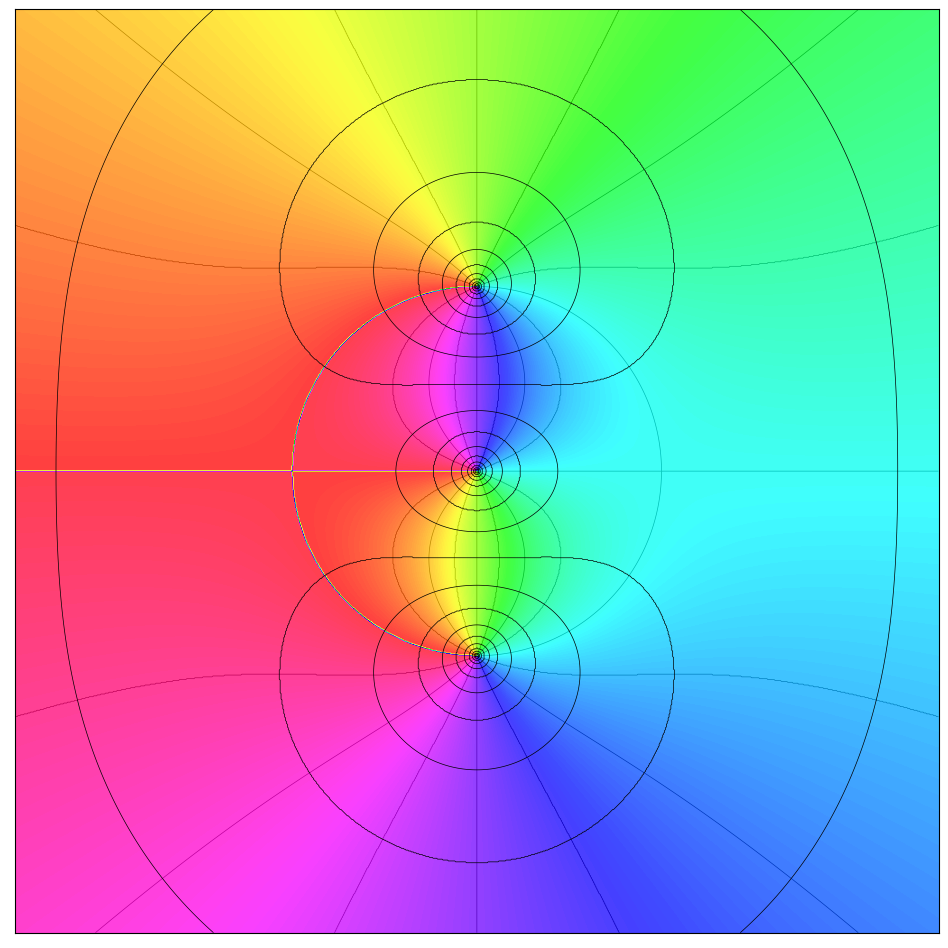

In [ ]:
# TODO: 

T = linspace(-2.5, 2.5, 1024)
X, Y = meshgrid(T, T)
Z = X + 1j * Y

W = Joukowsky(Z)

A = angle(W)
N = 4
An = (A / pi) * N
L = log(abs(W))


figure(figsize=(12.0, 12.0))
xlim(-2.5, 2.5, -2.5, 2.5)
# ax = fig.add_axes([e, e, 1 - 2 * e, 1 - 2 * e], frameon=True, facecolor="black")
ax = gca()
ax.set_facecolor("white")

# TODO:
#   - deal with discontinuity
#   - tweak luminance of the image?
# => work with the A -> RBG conversion ourselves.

im = ax.imshow(
    A,
    interpolation="bicubic",
    cmap="hsv", #"twilight", #"Spectral",
    rasterized=True,
    alpha=0.75,
)
ax.contour(An - round_(An), 1, colors="black", linewidths=0.5, zorder=-100)
ax.contour(L - round_(L), 1, colors="black", linewidths=0.5)

#colorbar(im)
ax.set_xticks([])
ax.set_yticks([])
None